# Linear Regression

In [80]:
# import modules 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline 


In [81]:
cleaned_data = pd.read_csv('../cleaning-preprocessing/cleaned_flight_data_with_target.csv')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Columns: 111 entries, MONTH to Condition_Wintry Mix / Windy
dtypes: bool(96), float64(1), int64(14)
memory usage: 5.9 MB


In [82]:
cleaned_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,...,Condition_Light Snow / Windy,Condition_Mostly Cloudy,Condition_Mostly Cloudy / Windy,Condition_Partly Cloudy,Condition_Partly Cloudy / Windy,Condition_Rain,Condition_Rain / Windy,Condition_Snow,Condition_Wintry Mix,Condition_Wintry Mix / Windy
0,11,1,5,124,636,324,448,48,34,58,...,False,False,False,False,False,False,False,False,False,False
1,11,1,5,371,2475,340,531,48,34,58,...,False,False,False,False,False,False,False,False,False,False
2,11,1,5,181,1069,301,482,48,34,58,...,False,False,False,False,False,False,False,False,False,False
3,11,1,5,168,944,345,513,48,34,58,...,False,False,False,False,False,False,False,False,False,False
4,11,1,5,139,760,360,499,46,32,58,...,False,False,False,False,False,False,False,False,False,False


In [83]:
cleaned_data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,DEP_DELAY
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,225.288203,1267.746079,831.003851,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,6.374983
std,4.991723,8.750179,1.985230,119.482417,889.343246,299.398525,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,38.735144
min,1.000000,1.000000,1.000000,57.000000,94.000000,301.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,-22.000000
25%,1.000000,8.000000,2.000000,124.000000,483.000000,545.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,-6.000000
50%,11.000000,16.000000,4.000000,188.000000,1029.000000,856.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,-3.000000
75%,12.000000,24.000000,6.000000,365.000000,2248.000000,1095.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,2.000000
max,12.000000,31.000000,7.000000,697.000000,4983.000000,1439.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,1276.000000


In [84]:
print(f"Total columns: {cleaned_data.shape[1]}")

# Compute correlations with DEP_DELAY
corr_with_dep_delay = cleaned_data.corr()['DEP_DELAY'].abs()

# Filter columns with correlation > 0.01
filtered_corr = corr_with_dep_delay[corr_with_dep_delay > 0.01]

# Print the number of columns with correlation > 0.01
print(f"Columns with correlation > 0.01: {len(filtered_corr)}")

# Print the filtered correlation values - 49 out of 111 coloumns have 0.01 higher correlation. Use these
print(filtered_corr)

Total columns: 111
Columns with correlation > 0.01: 49
MONTH                              0.046455
DAY_OF_MONTH                       0.036618
CRS_ELAPSED_TIME                   0.030871
DISTANCE                           0.031507
CRS_DEP_M                          0.102384
CRS_ARR_M                          0.043691
Temperature                        0.032261
Humidity                           0.011776
Wind Speed                         0.067718
Wind Gust                          0.044340
Pressure                           0.064939
sch_dep                            0.065452
DEP_DELAY                          1.000000
OP_UNIQUE_CARRIER_B6               0.031611
OP_UNIQUE_CARRIER_DL               0.014189
OP_UNIQUE_CARRIER_OO               0.027679
OP_UNIQUE_CARRIER_YX               0.011398
DEST_BOS                           0.022810
DEST_BTV                           0.013339
DEST_BUF                           0.013469
DEST_BWI                           0.027836
DEST_CHS             

In [85]:
# Select columns with correlation > 0.01 (excluding 'DEP_DELAY' itself)
selected_features = corr_with_dep_delay[corr_with_dep_delay > 0.01].index.drop('DEP_DELAY')

X = cleaned_data[selected_features]
y = cleaned_data['DEP_DELAY']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [87]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [88]:
print(lm.intercept_)
print(lm.coef_)

295.93489786659126
[ 3.95557913e-01 -1.73746468e-01  8.36773176e-02 -1.13047956e-02
  1.15857701e-02  1.74457284e-03 -3.68851975e-01  9.95521137e-03
  2.28202358e-01 -2.94447395e-02 -9.55591965e+00 -2.69390797e-01
  3.05064576e+00  1.82080538e+00  2.21999366e+00 -1.04088636e+00
  3.03275044e+00  1.68819557e+00  2.23420309e+00  1.21781141e+01
 -2.57230094e+00  5.34048135e+00  3.19534792e+00 -1.96217433e+00
  6.59712647e+00 -3.71373910e+00  4.05833318e+00 -3.82850326e+00
  2.63862356e+00 -4.24133887e+00  1.72596994e+01 -2.47745862e+00
 -1.98175413e+00  9.17110939e+00 -2.14533085e+00  6.49409112e+00
  1.39834003e+00  1.52736947e+01  3.33071142e+01  5.65180614e+01
  8.78833139e-01  5.76526403e+00  5.40944546e+01  3.63996099e-01
 -5.45446825e-02  7.44336615e+00  5.12545292e+00  5.13746054e+01]


In [89]:
print(lm.intercept_)

coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

295.93489786659126
                                 Coefficient
MONTH                               0.395558
DAY_OF_MONTH                       -0.173746
CRS_ELAPSED_TIME                    0.083677
DISTANCE                           -0.011305
CRS_DEP_M                           0.011586
CRS_ARR_M                           0.001745
Temperature                        -0.368852
Humidity                            0.009955
Wind Speed                          0.228202
Wind Gust                          -0.029445
Pressure                           -9.555920
sch_dep                            -0.269391
OP_UNIQUE_CARRIER_B6                3.050646
OP_UNIQUE_CARRIER_DL                1.820805
OP_UNIQUE_CARRIER_OO                2.219994
OP_UNIQUE_CARRIER_YX               -1.040886
DEST_BOS                            3.032750
DEST_BTV                            1.688196
DEST_BUF                            2.234203
DEST_BWI                           12.178114
DEST_CHS                           -

In [90]:
from sklearn import metrics

min_rss = np.sum((lm.intercept_ + lm.coef_*X_train.values - y_train.values.reshape(-1,1))**2)
print(min_rss, metrics.mean_squared_error(y_train, lm.predict(X_train))*len(X_train))

92530820578.99869 33471358.75710093


In [91]:
# Predict on the test set
y_pred = lm.predict(X_test)

# Calculate the performance metrics
print(f"Mean Squared Error (Test Set): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"R^2 (Test Set): {metrics.r2_score(y_test, y_pred)}")

Mean Squared Error (Test Set): 1406.6464320122711
R^2 (Test Set): 0.03513177842097881


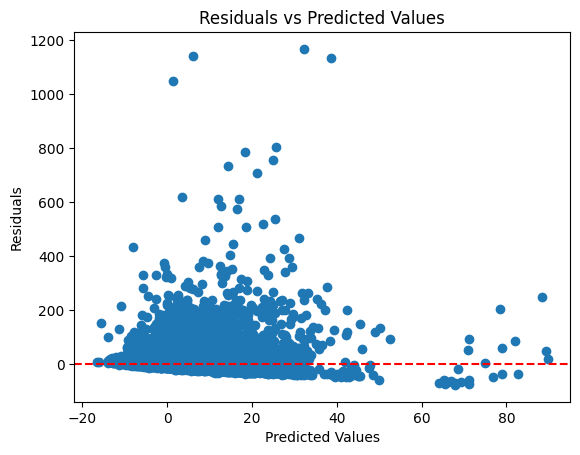

In [92]:
# Residuals
residuals = y_train - lm.predict(X_train)

# Plot residuals vs predicted values
plt.scatter(lm.predict(X_train), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


## Ridge Regression

In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split your data into train/test (already done, but just a reminder)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Ridge Regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength (default is 1.0)

# Fit the model
ridge.fit(X_train, y_train)

# Print intercept and coefficients
print("Intercept:", ridge.intercept_)
coef_df_ridge = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
print(coef_df_ridge)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate the model
from sklearn import metrics
print(f"Mean Squared Error (Test Set): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"R^2 (Test Set): {metrics.r2_score(y_test, y_pred)}")


Intercept: 297.16632452187383
                                 Coefficient
MONTH                               0.397013
DAY_OF_MONTH                       -0.174652
CRS_ELAPSED_TIME                    0.083390
DISTANCE                           -0.011268
CRS_DEP_M                           0.011609
CRS_ARR_M                           0.001740
Temperature                        -0.370293
Humidity                            0.009921
Wind Speed                          0.228920
Wind Gust                          -0.029059
Pressure                           -9.593928
sch_dep                            -0.269632
OP_UNIQUE_CARRIER_B6                3.050128
OP_UNIQUE_CARRIER_DL                1.825116
OP_UNIQUE_CARRIER_OO                2.205928
OP_UNIQUE_CARRIER_YX               -1.046415
DEST_BOS                            3.024097
DEST_BTV                            1.672232
DEST_BUF                            2.224705
DEST_BWI                           12.130180
DEST_CHS                 

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split



# Create the Lasso Regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength (default is 1.0)

# Fit the model
lasso.fit(X_train, y_train)

# Print intercept and coefficients
print("Intercept:", lasso.intercept_)
coef_df_lasso = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
print(coef_df_lasso)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
from sklearn import metrics
print(f"Mean Squared Error (Test Set): {metrics.mean_squared_error(y_test, y_pred)}")
print(f"R^2 (Test Set): {metrics.r2_score(y_test, y_pred)}")


Intercept: 271.92466838624046
                                 Coefficient
MONTH                               0.416453
DAY_OF_MONTH                       -0.176619
CRS_ELAPSED_TIME                    0.081697
DISTANCE                           -0.011473
CRS_DEP_M                           0.012493
CRS_ARR_M                           0.001379
Temperature                        -0.358735
Humidity                            0.001023
Wind Speed                          0.285543
Wind Gust                          -0.005974
Pressure                           -8.728394
sch_dep                            -0.268727
OP_UNIQUE_CARRIER_B6                2.353083
OP_UNIQUE_CARRIER_DL                1.075142
OP_UNIQUE_CARRIER_OO                0.000000
OP_UNIQUE_CARRIER_YX               -0.000000
DEST_BOS                            0.000000
DEST_BTV                            0.000000
DEST_BUF                            0.000000
DEST_BWI                            3.344761
DEST_CHS                 

C:\Users\colin\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.934e+04, tolerance: 3.484e+03
  model = cd_fast.enet_coordinate_descent(
